In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/hernanChain/csvFiles/master/Oils/olive.csv")

In [3]:
data.shape
data

,Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1,North-Apulia,1075,75,226,7823,672,36,60,29
1,1,North-Apulia,1088,73,224,7709,781,31,61,29
2,1,North-Apulia,911,54,246,8113,549,31,63,29
3,1,North-Apulia,966,57,240,7952,619,50,78,35
4,1,North-Apulia,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...
567,3,West-Liguria,1280,110,290,7490,790,10,10,2
568,3,West-Liguria,1060,100,270,7740,810,10,10,3
569,3,West-Liguria,1010,90,210,7720,970,0,0,2
570,3,West-Liguria,990,120,250,7750,870,10,10,2


In [4]:
data.isnull().sum()

Region         0
Area           0
palmitic       0
palmitoleic    0
stearic        0
oleic          0
linoleic       0
linolenic      0
arachidic      0
eicosenoic     0
dtype: int64

In [5]:
data.dtypes

Region          int64
Area           object
palmitic        int64
palmitoleic     int64
stearic         int64
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
dtype: object

In [6]:
indices = [26, 176, 392,570 ]
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)

In [7]:
data = data.drop(indices, axis =0)
data = data.drop(['Region','Area'],axis=1)
samples = samples.drop(['Region','Area'],axis=1)

In [8]:
X = data.copy()

In [9]:
inercia = []
for i in range(1, 20):
  algoritmo = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10)
  algoritmo.fit(X)
  inercia.append(algoritmo.inertia_)

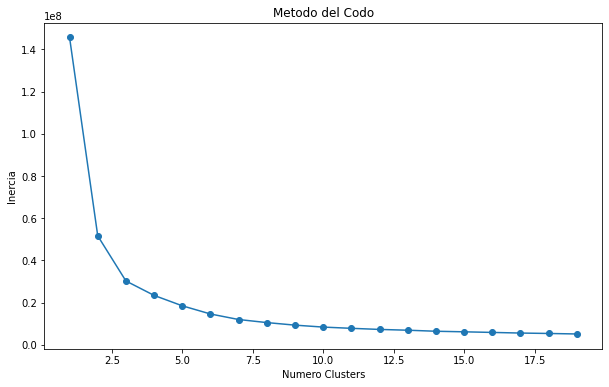

In [10]:
plt.figure(figsize=[10,6])
plt.title('Metodo del Codo')
plt.xlabel('Numero Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)),inercia, marker='o')
plt.show()

In [17]:
algoritmo = KMeans(n_clusters=6, init='k-means++',max_iter=300, n_init=10)

In [18]:
algoritmo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
centers, labels = algoritmo.cluster_centers_, algoritmo.labels_

In [20]:
labels.shape

(568,)

In [21]:
pred = algoritmo.predict(samples)
for i, p in enumerate(pred):
  print("Muestra ",i," se encuentra en el cluster: ",p)

Muestra  0  se encuentra en el cluster:  2
Muestra  1  se encuentra en el cluster:  0
Muestra  2  se encuentra en el cluster:  4
Muestra  3  se encuentra en el cluster:  5


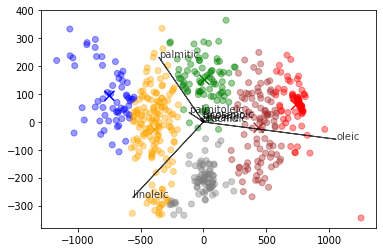

In [22]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centers)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']
#colores = ['blue', 'red', 'green']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[labels[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()